**¡Hola Juan Carlos!** 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima. Si en algún punto tienes comentarios, siéntete libre de dejarlos también. Al final del notebook, te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso.:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [21]:
# Cargo las librerías que me van a servir a partir de ahora.
import pandas as pd
import numpy as np
from scipy import stats as st



## Cargar datos

In [22]:
df_users = pd.read_csv('/datasets/megaline_users.csv')
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo importando las liberías necesarias y los datasets del proyecto.
    
    
</div>

## Preparar los datos

Exploro los datos de los datasets uno por uno para comprender qué valores puedo encontrar en cada uno y comenzar a corregir errores que podrían afectar o dificultar el análisis.

## Tarifas / Planes

In [23]:
# Imprimo la información general/resumida sobre el DataFrame de las tarifas.
df_plans.info()

# Imprimo una muestra de los datos para las tarifas.
df_plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate



El dataset es tan pequeño que no vale la pena buscar valores perdidos o duplicados, y los tipos de las columnas me parecen correctos. Sin embargo voy a cambio el índice por los nombres de los planes Surf y Ultimate, y a gener una columna nueva donde se muestren los GB que incluye cada plan, después organizaré las columnas en un orden que me parece más adecuado.

In [24]:
# Genero una columna con los nombres de los planes:
plan = ["surf", "ultimate"]
df_plans['plan'] = plan

#Genero una columna nueva donde se muestre la cantidad de GB que incluye cada plan.
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024

#Reordeno las columnas para que sean más comprensibles.
columns_order = ['plan', 'usd_monthly_pay', 'gb_per_month_included', 'mb_per_month_included', 'minutes_included',
                 'messages_included', 'usd_per_gb', 'usd_per_minute', 'usd_per_message']
df_plans = df_plans[columns_order]
df_plans

,plan,usd_monthly_pay,gb_per_month_included,mb_per_month_included,minutes_included,messages_included,usd_per_gb,usd_per_minute,usd_per_message
0,surf,20,15.0,15360,500,50,10,0.03,0.03
1,ultimate,70,30.0,30720,3000,1000,7,0.01,0.01


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Excelente Juan Carlos.

</div>

## Usuarios/as

In [25]:
# Imprimo la información general/resumida sobre el DataFrame de usuarios.
df_users.info()

# Imprimo una muestra de datos para usuarios.
df_users.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
178,1178,Charlsie,Reid,53,"Cincinnati, OH-KY-IN MSA",2018-10-05,surf,NaN
10,1010,Wilber,Blair,52,"Dallas-Fort Worth-Arlington, TX MSA",2018-03-09,surf,NaN
148,1148,Dwana,Moore,67,"Columbia, SC MSA",2018-11-04,surf,NaN
255,1255,Kennith,Rowland,22,"Oklahoma City, OK MSA",2018-08-01,ultimate,NaN
459,1459,Santos,Head,40,"San Francisco-Oakland-Berkeley, CA MSA",2018-04-27,ultimate,NaN


In [26]:
# Cambio Churn_date y reg_date al tipo fecha.
df_users["churn_date"] = pd.to_datetime(df_users["churn_date"])
df_users["reg_date"] = pd.to_datetime(df_users["reg_date"])

# Elimino los valores nulos cambiándolos por la fecha 1900-01-01.
df_users["churn_date"] = df_users["churn_date"].fillna("1900-01-01")
df_users.sample(5)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
127,1127,Marchelle,Brock,28,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-23,surf,1900-01-01
489,1489,Londa,Jenkins,72,"Detroit-Warren-Dearborn, MI MSA",2018-05-24,surf,1900-01-01
236,1236,Odell,Juarez,74,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-04-04,ultimate,1900-01-01
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,1900-01-01
400,1400,Kenton,Hickman,72,"Riverside-San Bernardino-Ontario, CA MSA",2018-03-08,surf,1900-01-01


In [27]:
# Combino las columnas first_name y last name, para crear la columna "user_name".
df_users["user_name"] = df_users["first_name"].astype(str) + " " + df_users["last_name"]

# Elimino las columnas first_name y last_name.
df_users = df_users.drop(["first_name", "last_name"], axis=1)

# Reordeno las columnas a un orden más lógico y comprensible para mí.
users_columns = ["user_id", "plan", "user_name", "age", "city", "reg_date", "churn_date"]
df_users = df_users[users_columns]
df_users.sample(5)


,user_id,plan,user_name,age,city,reg_date,churn_date
217,1217,surf,Ned Thomas,69,"Dayton-Kettering, OH MSA",2018-06-04,1900-01-01
149,1149,surf,Jamaal Camacho,54,"San Francisco-Oakland-Berkeley, CA MSA",2018-03-03,1900-01-01
422,1422,ultimate,Georgianne Huff,41,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-04-03,1900-01-01
150,1150,ultimate,Earlie Giles,46,"Houston-The Woodlands-Sugar Land, TX MSA",2018-09-19,1900-01-01
290,1290,surf,Thaddeus Compton,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-14,1900-01-01


In [28]:
# Cambio el tipo de la columna "user_id" a string.
df_users["user_id"] = df_users["user_id"].astype(str)

#Busco valores duplicados y muestro como queda el dataset limpio.
df_users['user_name'] = df_users["user_name"].str.upper()
print("Duplicados:", df_users.duplicated().sum())
df_users.sample(5)

Duplicados: 0


,user_id,plan,user_name,age,city,reg_date,churn_date
29,1029,surf,FRANKLYN HENSON,59,"Tampa-St. Petersburg-Clearwater, FL MSA",2018-01-05,1900-01-01
335,1335,surf,GAIL COLEMAN,61,"Dallas-Fort Worth-Arlington, TX MSA",2018-06-02,1900-01-01
13,1013,ultimate,NICOLAS SNIDER,50,"Knoxville, TN MSA",2018-12-01,1900-01-01
36,1036,ultimate,MYRON HODGE,70,"Denver-Aurora-Lakewood, CO MSA",2018-05-09,1900-01-01
242,1242,surf,LASHUNDA JOHNS,37,"San Antonio-New Braunfels, TX MSA",2018-06-02,1900-01-01


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Perfecto

</div>

## Llamadas

In [29]:
# Imprimo la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

# Imprimo una muestra de datos para las llamadas
df_calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [30]:
# User_id no me sirve como un int lo voy a cambiar a string.
df_calls["user_id"] = df_calls["user_id"].astype(str)

# call_date debería ser una fecha, lo cambio.
df_calls["call_date"] = pd.to_datetime(df_calls["call_date"])

# No tiene nulos, pero voy a revisar si tiene duplicados. Y muestro el dataframe.
print("Duplicados:", df_calls.duplicated().sum())

# Creo una columna que me muestre los minutos que se van a descontar por cada llamada realizada.
df_calls['minutes_charged'] = np.ceil(df_calls['duration'])
df_calls


Duplicados: 0


,id,user_id,call_date,duration,minutes_charged
0,1000_93,1000,2018-12-27,8.52,9.0
1,1000_145,1000,2018-12-27,13.66,14.0
2,1000_247,1000,2018-12-27,14.48,15.0
3,1000_309,1000,2018-12-28,5.76,6.0
4,1000_380,1000,2018-12-30,4.22,5.0
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9.0
137731,1499_200,1499,2018-10-20,10.89,11.0
137732,1499_201,1499,2018-09-21,8.12,9.0
137733,1499_202,1499,2018-10-10,0.37,1.0


<div class="alert alert-block alert-info">
<b>Comentario del alumno (2da Iteración) </b> <a class=“tocSkip”></a>

Aquí estaba el problema con las llamadas, ahora creé una columa que me muestra el consumo de llamadas redondeado para arriba los minutos.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Muy bien

</div>

## Mensajes

In [31]:
# Imprimo la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()

# Imprimo una muestra de datos para los mensajes
df_messages.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
67447,1438_13,1438,2018-11-22
43950,1293_433,1293,2018-12-22
60151,1381_264,1381,2018-10-26
72715,1470_343,1470,2018-06-24
33015,1205_90,1205,2018-11-24


In [32]:
# Igualmente user_id está como int lo cambio a string.
df_messages["user_id"] = df_messages["user_id"].astype(str)

# message_date no fue reconocido por python como una fecha, debo cambiarlo.
df_messages["message_date"] = pd.to_datetime(df_messages["message_date"])

# No tiene nulos, pero voy a revisar si tiene duplicados. Y muestro el dataframe.
print("Duplicados:", df_messages.duplicated().sum())
df_messages

Duplicados: 0


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo Juan Carlos


</div>

## Internet

In [33]:
# Imprimo la información general/resumida sobre el DataFrame de internet.
df_internet.info()

# Imprime una muestra de datos para el tráfico de internet
df_internet.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
12260,1059_371,1059,2018-07-28,10.51
48154,1214_528,1214,2018-07-18,383.54
41338,1185_375,1185,2018-04-29,326.65
24406,1112_114,1112,2018-12-17,330.62
23339,1106_717,1106,2018-06-26,0.00


In [34]:
# una vez más cambio user_id a string.
df_users["user_id"] = df_users['user_id'] .astype(str)

# Session_date lo cambio a fecha.
df_internet["session_date"] = pd.to_datetime(df_internet["session_date"])

#Busco duplicados e imprimo el dataframe.
print("Duplicados:", df_internet.duplicated().sum())
df_internet


Duplicados: 0


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Excelente análisis exploratorio de datos.


</div>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [35]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans


,plan,usd_monthly_pay,gb_per_month_included,mb_per_month_included,minutes_included,messages_included,usd_per_gb,usd_per_minute,usd_per_message
0,surf,20,15.0,15360,500,50,10,0.03,0.03
1,ultimate,70,30.0,30720,3000,1000,7,0.01,0.01


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

**LLAMADAS REALIZADAS AL MES POR USUARIO**


In [36]:
#Combino el dataframe de usuarios con el de llamadas.
df_calls_names = pd.merge(df_users, df_calls, on='user_id')

# Calculo el número de llamadas hechas por cada usuario al mes. Guardo el resultado.
df_calls_month = df_calls_names.groupby(['user_id', 'user_name', df_calls_names['call_date'].dt.month])['duration'].count()
df_calls_month = df_calls_month.reset_index()
df_calls_month = df_calls_month.rename(columns={'call_date': 'month', 'duration': 'calls'})
df_calls_month


,user_id,user_name,month,calls
0,1000,ANAMARIA BAUER,12,16
1,1001,MICKEY WILKERSON,8,27
2,1001,MICKEY WILKERSON,9,49
3,1001,MICKEY WILKERSON,10,65
4,1001,MICKEY WILKERSON,11,64
...,...,...,...,...
2253,1498,SCOT WILLIAMSON,12,39
2254,1499,SHENA DICKSON,9,41
2255,1499,SHENA DICKSON,10,53
2256,1499,SHENA DICKSON,11,45


**MINUTOS USADOS AL MES**

In [57]:
# Calculo la cantidad de minutos que se le cobraron a cada usuario al mes. Guarda el resultado.
# Aquí el cálculo ya lo hice con base en los minutos redondeados hacia arriba.
df_minutes_month = df_calls_names.groupby(['user_id', 'user_name', df_calls_names['call_date'].dt.month])['minutes_charged'].sum()
df_minutes_month = df_minutes_month.reset_index()
df_minutes_month = df_minutes_month.rename(columns={'minutes_charged': 'minutes_used', 'call_date': 'month'})
df_minutes_month['user_id'] = df_minutes_month['user_id'].astype(str)
df_minutes_month['minutes_used'] = df_minutes_month['minutes_used'].astype(int)
df_minutes_month


,user_id,user_name,month,minutes_used
0,1000,ANAMARIA BAUER,12,124
1,1001,MICKEY WILKERSON,8,182
2,1001,MICKEY WILKERSON,9,315
3,1001,MICKEY WILKERSON,10,393
4,1001,MICKEY WILKERSON,11,426
...,...,...,...,...
2253,1498,SCOT WILLIAMSON,12,339
2254,1499,SHENA DICKSON,9,346
2255,1499,SHENA DICKSON,10,385
2256,1499,SHENA DICKSON,11,308


**MENSAJES ENVIADOS AL MES POR USUARIO**

In [38]:
# Dentro del df messages creo una columna llamada month, extraída de la columna de la fecha del mismo df.
df_messages["month"] = df_messages["message_date"].dt.month

# Calculo el número de mensajes enviados por cada usuario al mes. Y guardo el resultado.
df_messages_names = pd.merge(df_users, df_messages, on='user_id')
df_messages_month = df_messages_names.groupby(['user_id', 'user_name', 'month'])['month'].count().reset_index(name='messages')
df_messages_month['user_id'] = df_messages_month['user_id'].astype(str)
df_messages_month


,user_id,user_name,month,messages
0,1000,ANAMARIA BAUER,12,11
1,1001,MICKEY WILKERSON,8,30
2,1001,MICKEY WILKERSON,9,44
3,1001,MICKEY WILKERSON,10,53
4,1001,MICKEY WILKERSON,11,36
...,...,...,...,...
1801,1496,ARIEL SHEPHERD,9,21
1802,1496,ARIEL SHEPHERD,10,18
1803,1496,ARIEL SHEPHERD,11,13
1804,1496,ARIEL SHEPHERD,12,11


**DATOS UTILIZADOS POR USUARIO AL MES**

In [39]:
# Combino los dos df para tener el nombre del usuario.
df_users['user_id'] = df_users['user_id'].astype(int)
df_internet['user_id'] = df_internet['user_id'].astype(int)
df_internet_names = pd.merge(df_users, df_internet, on='user_id')

# Creo la columna month a partir de la columna de la fecha.
df_internet_names['month'] = df_internet_names['session_date'].dt.month

# Calculo el volumen del tráfico de Internet usado por cada usuario al mes. Guardo el resultado.

df_internet_month = df_internet_names.groupby(['user_id', 'user_name', 'month', 'plan'])['mb_used'].sum()
df_internet_month = df_internet_month.reset_index()

# Calculo el total de GB que se le cobraron a cada cliente por mes, dividiendo los mb entre 1024 y redondeando el resultado hacia arriba.

df_internet_month["data_in_gb"] = np.ceil(df_internet_month["mb_used"] / 1024).astype(int)
df_internet_month['user_id'] = df_internet_month['user_id'].astype(str)
df_internet_month

,user_id,user_name,month,plan,mb_used,data_in_gb
0,1000,ANAMARIA BAUER,12,ultimate,1901.47,2
1,1001,MICKEY WILKERSON,8,surf,6919.15,7
2,1001,MICKEY WILKERSON,9,surf,13314.82,14
3,1001,MICKEY WILKERSON,10,surf,22330.49,22
4,1001,MICKEY WILKERSON,11,surf,18504.30,19
...,...,...,...,...,...,...
2272,1498,SCOT WILLIAMSON,12,surf,23137.69,23
2273,1499,SHENA DICKSON,9,surf,12984.76,13
2274,1499,SHENA DICKSON,10,surf,19492.43,20
2275,1499,SHENA DICKSON,11,surf,16813.83,17


<div class="alert alert-block alert-info">
<b>Comentario del alumno (2da Iteración) </b> <a class=“tocSkip”></a>

Aquí estaba el problema con los GB, le agregué la función np.ceil() que me muestra el float redondeado para arriba, luego sólo lo convertí a int.
</div>

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [40]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

users_merged_df = pd.merge(df_calls_month, df_minutes_month, on=['user_id', 'user_name', 'month'], how='outer')
users_merged_df = pd.merge(users_merged_df, df_messages_month, on=['user_id', 'user_name', 'month'], how='outer')
users_merged_df = pd.merge(users_merged_df, df_internet_month, on=['user_id', 'user_name', 'month'], how='outer')

# Reemplazo valores perdidos y cambio los tipos de las columnas.
users_merged_df.fillna(0, inplace=True)
users_merged_df['calls'] = users_merged_df['calls'].astype(int)
users_merged_df['messages'] = users_merged_df['messages'].astype(int)
users_merged_df['minutes_used'] = users_merged_df['minutes_used'].astype(int)
users_merged_df['data_in_gb'] = users_merged_df['data_in_gb'].astype(int)
users_merged_df

,user_id,user_name,month,calls,minutes_used,messages,plan,mb_used,data_in_gb
0,1000,ANAMARIA BAUER,12,16,124,11,ultimate,1901.47,2
1,1001,MICKEY WILKERSON,8,27,182,30,surf,6919.15,7
2,1001,MICKEY WILKERSON,9,49,315,44,surf,13314.82,14
3,1001,MICKEY WILKERSON,10,65,393,53,surf,22330.49,22
4,1001,MICKEY WILKERSON,11,64,426,36,surf,18504.30,19
...,...,...,...,...,...,...,...,...,...
2288,1349,FLORENTINA DIAZ,12,0,0,61,surf,13039.91,13
2289,1361,JACELYN HOFFMAN,5,0,0,2,surf,1519.69,2
2290,1482,ARMAND GLENN,10,0,0,2,0,0.00,0
2291,1108,PORFIRIO KANE,12,0,0,0,ultimate,233.17,1


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Juan Carlos muy buen uso de las funciones `merge` y `groupby`

</div>

In [41]:
df_plans['gb_per_month_included'] = df_plans['gb_per_month_included'].astype(int)
df_plans

,plan,usd_monthly_pay,gb_per_month_included,mb_per_month_included,minutes_included,messages_included,usd_per_gb,usd_per_minute,usd_per_message
0,surf,20,15,15360,500,50,10,0.03,0.03
1,ultimate,70,30,30720,3000,1000,7,0.01,0.01


In [42]:
# Añade la información de la tarifa

df_income_per_client = users_merged_df.merge(df_plans, on='plan')
df_income_per_client


,user_id,user_name,month,calls,minutes_used,messages,plan,mb_used,data_in_gb,usd_monthly_pay,gb_per_month_included,mb_per_month_included,minutes_included,messages_included,usd_per_gb,usd_per_minute,usd_per_message
0,1000,ANAMARIA BAUER,12,16,124,11,ultimate,1901.47,2,70,30,30720,3000,1000,7,0.01,0.01
1,1006,JESUSA BRADFORD,11,2,10,15,ultimate,2068.37,3,70,30,30720,3000,1000,7,0.01,0.01
2,1006,JESUSA BRADFORD,12,9,59,139,ultimate,32118.82,32,70,30,30720,3000,1000,7,0.01,0.01
3,1008,EMELY HOFFMAN,10,71,476,21,ultimate,17106.99,17,70,30,30720,3000,1000,7,0.01,0.01
4,1008,EMELY HOFFMAN,11,63,446,37,ultimate,23676.72,24,70,30,30720,3000,1000,7,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,1194,ROBERT MCLEAN,12,0,0,56,surf,31088.49,31,20,15,15360,500,50,10,0.03,0.03
2273,1349,FLORENTINA DIAZ,10,0,0,76,surf,13093.55,13,20,15,15360,500,50,10,0.03,0.03
2274,1349,FLORENTINA DIAZ,11,0,0,72,surf,17128.26,17,20,15,15360,500,50,10,0.03,0.03
2275,1349,FLORENTINA DIAZ,12,0,0,61,surf,13039.91,13,20,15,15360,500,50,10,0.03,0.03


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [43]:
# Calculo el ingreso mensual para cada usuario.
# Creo una función para calcular los ingresos obtenidos por cada cliente, tomando en cuenta los ingresos por excedentes en los planes.

def calculate_income(row):
  # Creo la variable income para que almacene el ingreso, tomando como base el costo regular del plan.
    income = row['usd_monthly_pay']

    # Calculo los costos extra generados por llamadas, y los sumo a income.
    if row['minutes_used'] > row['minutes_included']:
        income += (row['minutes_used'] - row['minutes_included']) * row['usd_per_minute']

    # Calculo los costos extra generados por mensajes, y los sumo a income.
    if row['messages'] > row['messages_included']:
        income += (row['messages'] - row['messages_included']) * row['usd_per_message']

    # Calculo los costos extra generados por uso de internet, y los sumo a income.
    if row['data_in_gb'] > row['gb_per_month_included']:
        income += (row['data_in_gb'] - row['gb_per_month_included']) * row['usd_per_gb']
    return income

# Aplico la función al dataframe, en una nueva columna llamada "income":
df_income_per_client['income'] = df_income_per_client.apply(calculate_income, axis=1)

# Muestro solo las columnas que me interesan del df:
df_income = df_income_per_client[['user_id', 'user_name', 'month', 'plan', 'income']]
df_income


,user_id,user_name,month,plan,income
0,1000,ANAMARIA BAUER,12,ultimate,70.00
1,1006,JESUSA BRADFORD,11,ultimate,70.00
2,1006,JESUSA BRADFORD,12,ultimate,84.00
3,1008,EMELY HOFFMAN,10,ultimate,70.00
4,1008,EMELY HOFFMAN,11,ultimate,70.00
...,...,...,...,...,...
2272,1194,ROBERT MCLEAN,12,surf,180.18
2273,1349,FLORENTINA DIAZ,10,surf,20.78
2274,1349,FLORENTINA DIAZ,11,surf,40.66
2275,1349,FLORENTINA DIAZ,12,surf,20.33


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Juan Carlos, tu lógica para calcular el **income** es adecuada. No obstante, los valores obtenidos no son del todo correctos, debes tener en cuenta que de acuerdo con la descripción del proyecto los datos de minutos e internet (en GB) deben ser redondeados hacia arriba para hacer el cobro respectivo. Para esto puedes usar la función `np.ceil`

</div>

<div class="alert alert-block alert-info">
<b>Comentario del alumno (2da Iteración) </b> <a class=“tocSkip”></a>
Una disculpa, aparentemente subí un archivo que no era el correcto.
Hice los ajustes, afortunadamente los resultados arrojados por los datos fueron muy similares y no afectó a las conclusiones a las que llegué.
</div>

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

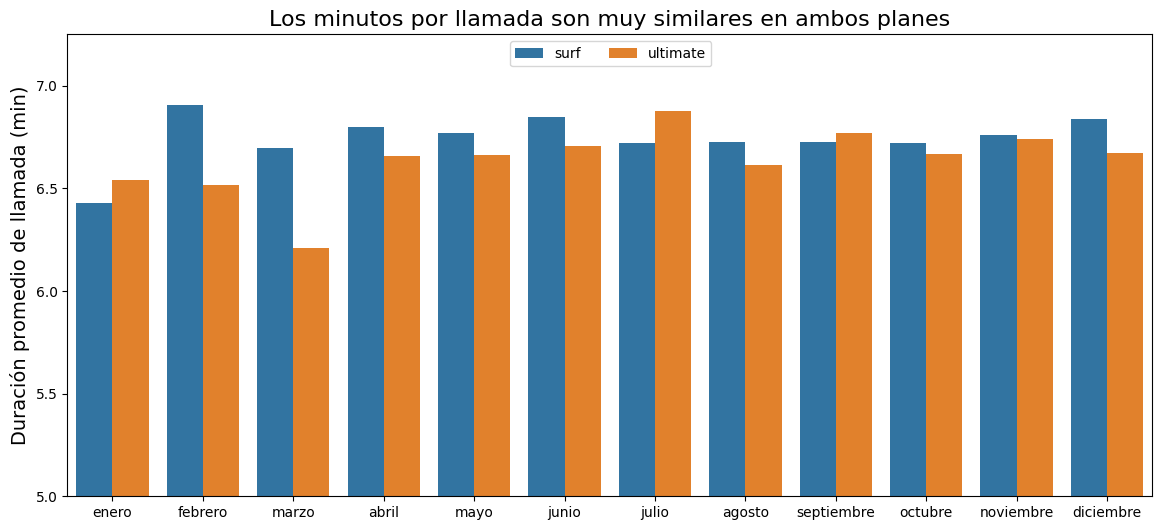

In [44]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
# Prepara el df que me servirá para la gráfica.
import seaborn as sns
import matplotlib.pyplot as plt

df_calls["user_id"] = df_calls["user_id"].astype(str)
df_users["user_id"] = df_users["user_id"].astype(str)
call_duration_per_plan = df_calls.merge(df_users, on='user_id')
call_duration_per_plan = call_duration_per_plan.merge(df_plans, on='plan')

call_duration_per_plan['month'] = call_duration_per_plan['call_date'].dt.month
calls_per_plan = call_duration_per_plan.groupby(['month','plan'])['duration'].mean()
calls_per_plan = calls_per_plan.reset_index()

meses = { 1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril", 5: "Mayo", 6: "Junio", 7: "Julio",
         8: "Agosto", 9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"}

calls_per_plan["months"] = calls_per_plan["month"].map(meses)
calls_per_plan["months"] = calls_per_plan["months"].str.lower()
calls_per_plan.drop("month", axis=1, inplace=True)

# Hago la gráfica de barras.
plt.figure(figsize=(14, 6))
sns.barplot(x='months', y='duration', hue='plan', data=calls_per_plan)

plt.title('Los minutos por llamada son muy similares en ambos planes', fontsize=16)
plt.xlabel('')
plt.ylabel('Duración promedio de llamada (min)', fontsize=14)
plt.legend(bbox_to_anchor=(.6, 1), ncol=2)

plt.ylim(5, None)
plt.show()



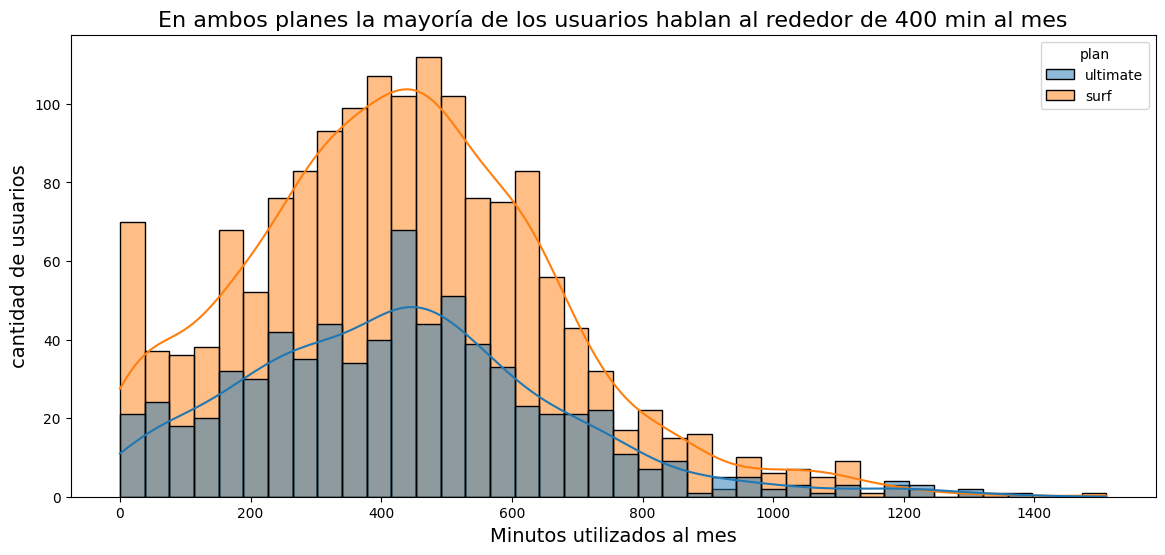

In [45]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

plt.figure(figsize=(14, 6))
sns.histplot(data=df_income_per_client, x= "minutes_used", hue= "plan", bins=40, kde=True)

plt.title('En ambos planes la mayoría de los usuarios hablan al rededor de 400 min al mes', fontsize=16)
plt.xlabel('Minutos utilizados al mes', fontsize=14)
plt.ylabel('cantidad de usuarios', fontsize=14)

plt.show()




[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [46]:
# Calcula la media y la varianza de la duración mensual de llamadas.
income_surf = df_income_per_client[df_income_per_client["plan"] == "surf"]
income_ultimate = df_income_per_client[df_income_per_client["plan"] == "ultimate"]
surf_mean = income_surf["minutes_used"].mean()
ultimate_mean = income_ultimate["minutes_used"].mean()

print("Media de Surf:", surf_mean)
print("Varianza de Surf:", income_surf["minutes_used"].var())
print()
print("Media de Ultimate:", ultimate_mean)
print("Varianza de Ultimate:", income_ultimate["minutes_used"].var())


Media de Surf: 429.8414634146341
Varianza de Surf: 54804.92090010495

Media de Ultimate: 431.0486787204451
Varianza de Ultimate: 57666.609047694685


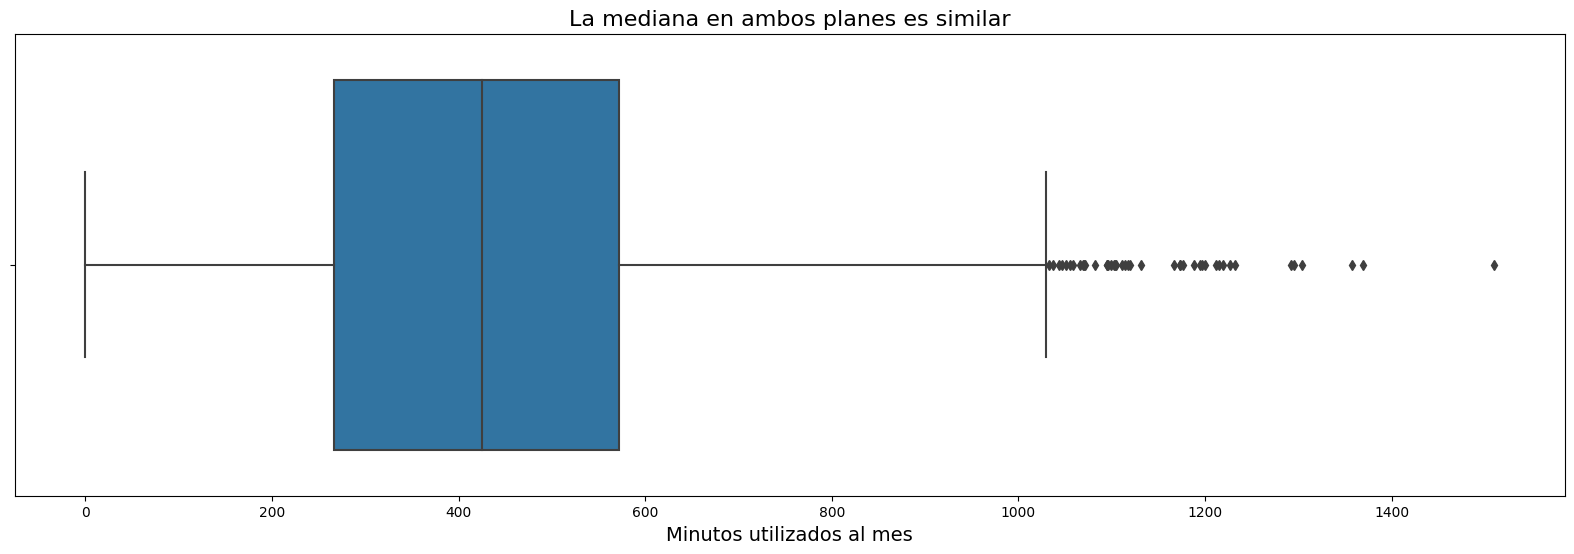

In [47]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas.


plt.figure(figsize=(20, 6))
sns.boxplot(data=df_income_per_client, x="minutes_used", hue= "plan")

plt.title('La mediana en ambos planes es similar', fontsize=16)
plt.xlabel('Minutos utilizados al mes', fontsize=14)


plt.show()


El comportamiento en las llamadas, tanto en la duración como en la cantidad de minutos consumidos al mes es similar en ambos planes.

### Mensajes

In [48]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

df_surf = df_income_per_client[df_income_per_client["plan"] == "surf"]
df_ultimate = df_income_per_client[df_income_per_client["plan"] == "ultimate"]

df_surf_messages = df_surf.groupby("month")["messages"].mean()
df_ultimate_messages = df_ultimate.groupby("month")["messages"].mean()

df_surf_messages = df_surf_messages.reset_index()
df_surf_messages["month"] = df_surf_messages["month"].map(meses)
df_surf_messages.rename(columns={'messages': 'surf'}, inplace=True)

df_ultimate_messages = df_ultimate_messages.reset_index()
df_ultimate_messages["month"] = df_ultimate_messages["month"].map(meses)
df_ultimate_messages.rename(columns={'messages': 'ultimate'}, inplace=True)


mean_plan_messages = df_ultimate_messages.merge(df_surf_messages, on="month")

mean_plan_messages

,month,ultimate,surf
0,Enero,15.500000,10.500000
1,Febrero,21.571429,12.000000
2,Marzo,20.250000,15.260870
3,Abril,22.047619,17.632653
4,Mayo,32.103448,23.657895
5,Junio,29.340426,24.410526
6,Julio,32.830508,26.033333
7,Agosto,38.478873,28.383648
8,Septiembre,37.895349,30.248705
9,Octubre,39.800000,33.371795


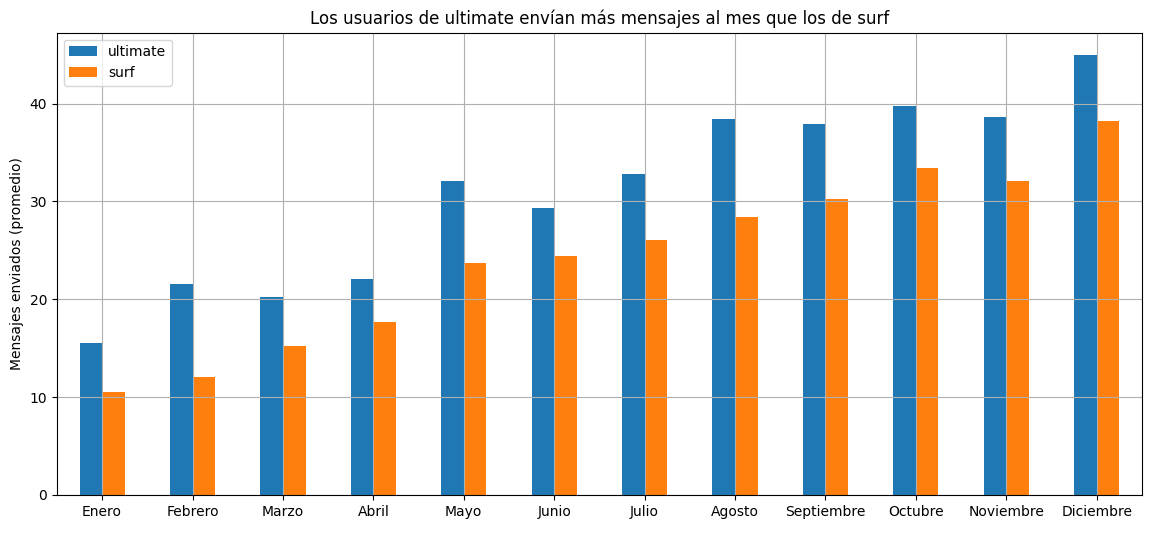

In [49]:
mean_plan_messages.plot(x="month", kind="bar", figsize=(14, 6), xlabel=" ", ylabel= "Mensajes enviados (promedio)", rot=0,
                        title="Los usuarios de ultimate envían más mensajes al mes que los de surf", grid=True)
plt.show()

Los usuarios de Ultimate suelen utilizar más mensajes al mes respecto de los usuarios de Surf, es normal porque el plan últimate incluye más mensajes en el costo base; sin embargo en promedio ninguno de los dos esquemas supera los 50 mensajes que es lo que incluye el plan más económico (surf).

### Internet

       plan  data_in_gb
0      surf   16.831194
1  ultimate   17.331015


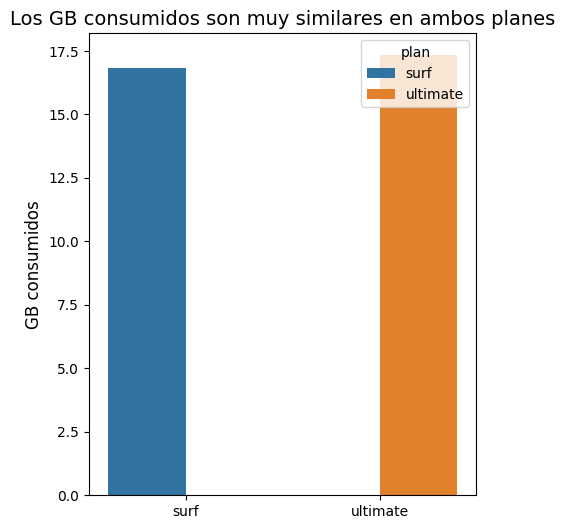

In [50]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

internet_per_plan = df_income_per_client.groupby("plan")["data_in_gb"].mean()
internet_per_plan = internet_per_plan.reset_index()

print(internet_per_plan)

plt.figure(figsize=(5, 6))
sns.barplot(x='plan', y='data_in_gb', hue='plan', data=internet_per_plan)

plt.title('Los GB consumidos son muy similares en ambos planes', fontsize=14)
plt.xlabel('')
plt.ylabel('GB consumidos', fontsize=12)
plt.show()



En promedio los usuarios de ambos esquemas utilizan una cantidad muy similar de GB al mes.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

Total de ingresos de Surf: 95159.35
Total de ingresos de Ultimate: 51996.0


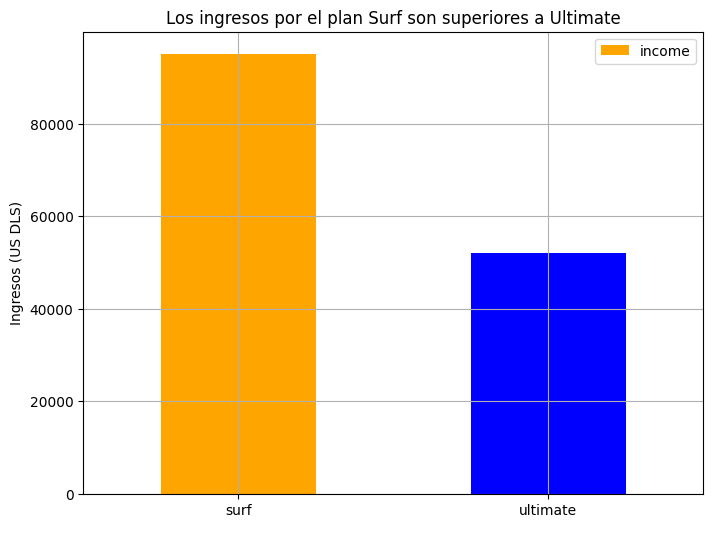

In [51]:
# Sumo los ingresos generados por ambos planes y los muestro en las siguientes gráficas:

total_income_surf = income_surf['income'].sum()
total_income_ultimate = income_ultimate['income'].sum()

print("Total de ingresos de Surf:", total_income_surf)
print("Total de ingresos de Ultimate:", total_income_ultimate)

income_per_plan = df_income_per_client.groupby("plan")["income"].sum()
income_per_plan = income_per_plan.reset_index()

income_per_plan.plot(x="plan", kind="bar", y='income', figsize=(8, 6), xlabel=" ", ylabel= "Ingresos (US DLS)", rot=0,
                        title="Los ingresos por el plan Surf son superiores a Ultimate", grid=True, color=['orange', 'blue'])
plt.show()


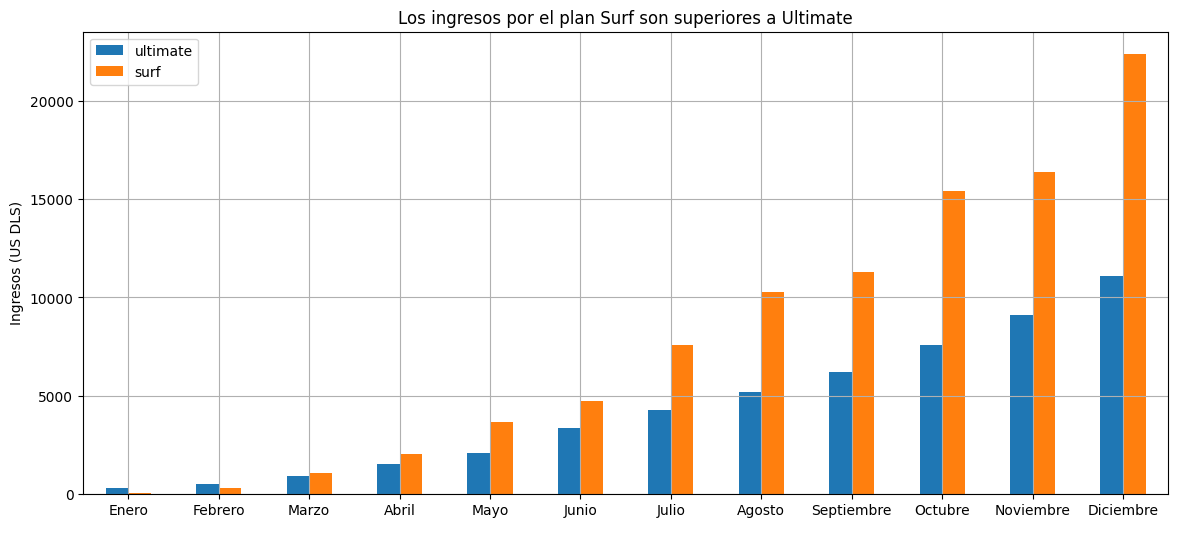

In [52]:
df_surf_income = df_surf.groupby("month")["income"].sum()
df_ultimate_income = df_ultimate.groupby("month")["income"].sum()

df_surf_income = df_surf_income.reset_index()
df_surf_income["month"] = df_surf_income["month"].map(meses)
df_surf_income.rename(columns={'income': 'surf'}, inplace=True)

df_ultimate_income = df_ultimate_income.reset_index()
df_ultimate_income["month"] = df_ultimate_income["month"].map(meses)
df_ultimate_income.rename(columns={'income': 'ultimate'}, inplace=True)

total_plan_income = df_ultimate_income.merge(df_surf_income, on="month")

total_plan_income.plot(x="month", kind="bar", figsize=(14, 6), xlabel=" ", ylabel= "Ingresos (US DLS)", rot=0,
                        title="Los ingresos por el plan Surf son superiores a Ultimate", grid=True)
plt.show()

In [53]:
income_divided = df_income_per_client.groupby(["plan", "user_id"])["income"].sum().reset_index()

surf_clients = df_surf['user_id'].nunique()
ultimate_clients = df_ultimate['user_id'].nunique()

print(f"Hay {surf_clients} clientes en el plan Surf.")
print(f"Hay {ultimate_clients} clientes en el plan Ultimate.")
print()
print("Tomando en cuenta los ingresos totales de ambos planes:")
print(f"Surf nos entrega un rendimiento promedio de {total_income_surf / surf_clients} al año por cliente, mientras que")
print(f"Ultimate nos entrega un rendimiento promedio de {total_income_ultimate / ultimate_clients} al año por cliente.")

Hay 332 clientes en el plan Surf.
Hay 157 clientes en el plan Ultimate.

Tomando en cuenta los ingresos totales de ambos planes:
Surf nos entrega un rendimiento promedio de 286.6245481927711 al año por cliente, mientras que
Ultimate nos entrega un rendimiento promedio de 331.18471337579615 al año por cliente.


Surf es el plan que más ingresos produjo este año, sin embargo los datos muestran que el plan Ultimate tiene un mejor rendimiento por cliente; esto se explica porque que tenemos más del doble de clientes en Surf que en Ultimate.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Muy buen trabajo obteniendo las gráficas, pero aún más incluyendo tus análisis.

</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

La hipótesis nula es que la media de los ingresos de ambas poblaciones estadísticas (Surf y Ultimate) son iguales; y la hipótesis alternativa es que una de ellas es superior.


In [54]:
# Prueba las hipótesis

income_surf_per_client = df_surf["income"]
income_ultimate_per_client = df_ultimate["income"]

alpha = 0.05

results = st.ttest_ind(income_surf_per_client, income_ultimate_per_client)
print('valor p: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazo la hipótesis nula, los ingresos promedio son diferentes.")
else:
    print("No rechazo la hipótesis nula")
print()
print(f"La media de surf es {income_surf_per_client.mean()} \ny la media de Ultimate es {income_ultimate_per_client.mean()}")

valor p:  8.433171661384525e-08
Rechazo la hipótesis nula, los ingresos promedio son diferentes.

La media de surf es 61.07788831835687 
y la media de Ultimate es 72.31710709318497


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

La hipótesis nula es que el promedio de los ingresos generados por los usuarios del área de NY-NJ es igual o muy similar al ingreso del resto de las demás áreas; la hipótesis alternativa es que son diferentes.

In [55]:
# Prueba las hipótesis

locations = df_users[["user_id","city"]]
locations = locations.merge(df_income_per_client, on="user_id")

ny_nj = locations[locations['city'].str.contains("NY-NJ")]
other_regions = locations[~locations['city'].str.contains("NY-NJ")]

# pruebo hipótesis nula, con un umbral del 5%:

income_ny_nj = ny_nj["income"]
income_other_regions = other_regions["income"]

alpha = 0.05

prueba = st.ttest_ind(income_ny_nj, income_other_regions)
print('valor p: ', prueba.pvalue)

if prueba.pvalue < alpha:
    print("Rechazo la hipótesis nula, los ingresos promedio son diferentes.")
else:
    print("No rechazo la hipótesis nula")
print()
print(f"La media de ingresos de NY-NJ es {income_ny_nj.mean()} \ny la media de ingresos de otros lugares es {income_other_regions.mean()}")



valor p:  0.03134450958626738
Rechazo la hipótesis nula, los ingresos promedio son diferentes.

La media de ingresos de NY-NJ es 59.894547872340425 
y la media de ingresos de otros lugares es 65.56286165176223


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Excelente Juan Carlos

</div>

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Surf es el plan que más ingresos nos otorga, pero los datos demuestran que el plan Ultimate genera más ingresos por cliente, sería bueno dedicar esfuerzos para en conseguir más clientes para Ultimate o para lograr que algunos de nuestros clientes de Surf se cambien al otro esquema.

Los datos arrojan que el comportamiento de los usuarios en ambos esquemas de pago es similar, es por ello que convendría que algunos usuarios de Surf pasen a Ultimate.

La región NY-NJ tiene un ingreso promedio inferior que el promedio del resto de regiones.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    

Buena conclusión
    
</div>

-----

<div class="alert alert-block alert-warning">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
    
Juan Carlos, tu desempeño en este proyecto ha sido realmente impresionante, especialmente en lo que respecta a tu análisis exploratorio de datos, que fue excelente. Tu dominio de las técnicas de visualización de datos y pruebas de hipótesis es notable, demostrando una sólida comprensión de estos aspectos cruciales en el análisis de datos. Es particularmente sobresaliente que hayas incluido análisis en cada sección, lo cual añade un valor significativo a tu trabajo y muestra tu capacidad para extraer insights relevantes. En cuanto al cálculo del "income" para cada usuario, tu lógica es acertada, aunque te sugiero hacer un pequeño ajuste para redondear las cifras de llamadas e internet, lo cual mejorará la precisión de tus resultados. Este detalle, una vez refinado, complementará perfectamente la calidad general de tu proyecto. Estaré pendiente de tu próxima interación 👀


</div>